### Imports

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading

In [144]:
def perform_df_format_transform(df):
    t_df = df.T
    t_df.columns = t_df.iloc[0]
    t_df = t_df[1:]
    t_df = t_df.apply(pd.to_numeric, errors='coerce')
    return t_df;

st_df = perform_df_format_transform(pd.read_csv("./resources/single_thread_samples.txt", header=None))
mt_df = perform_df_format_transform(pd.read_csv("./resources/concurrent_samples.txt", header=None))

st_df.head()

,16.0,32.0,128.0,512.0,1024.0
1,53.100,29.892,9.772,2.560,1.472
2,54.516,30.412,9.972,2.420,1.472
3,55.056,31.312,10.732,2.872,1.432
4,55.132,29.944,11.028,2.872,1.324
5,53.620,33.484,10.548,2.856,1.316


### Generate Macro Stats

In [145]:
mt_df[16].describe()

count    58.000000
mean      1.033448
std       0.641513
min       0.068000
25%       0.661000
50%       0.896000
75%       1.216000
max       2.892000
Name: 16.0, dtype: float64

In [146]:
st_df[16].describe()

count    59.000000
mean     19.817017
std      12.514837
min      10.140000
25%      12.810000
50%      14.180000
75%      22.586000
max      55.132000
Name: 16.0, dtype: float64

In [147]:
st_df[1024].describe()

count    31.000000
mean      0.446194
std       0.464682
min       0.004000
25%       0.166000
50%       0.224000
75%       0.594000
max       1.472000
Name: 1024.0, dtype: float64

In [148]:
mt_df[1024].describe()

count    49.000000
mean      0.217959
std       0.198464
min       0.004000
25%       0.144000
50%       0.164000
75%       0.180000
max       0.920000
Name: 1024.0, dtype: float64

### Figure Generation

Text(0, 0.5, 'Tickrate')

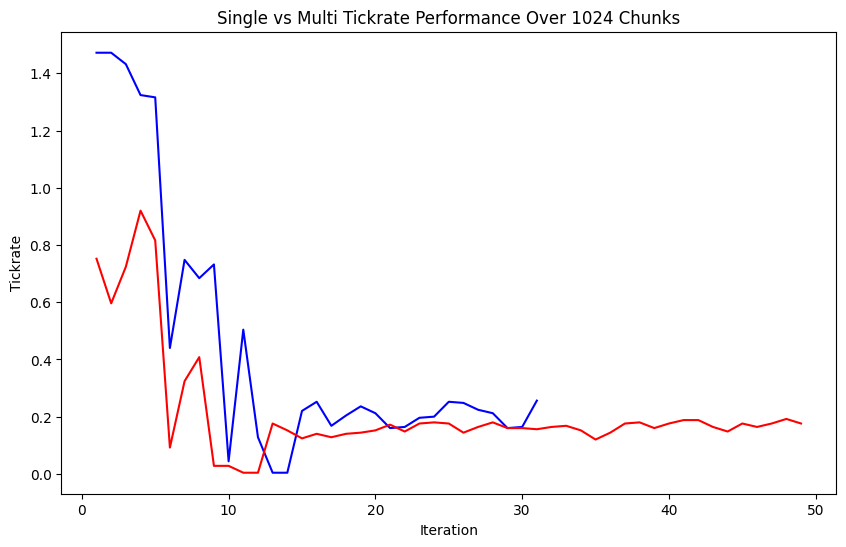

In [153]:
st_df
mt_df

st_data = st_df[1024].dropna()
mt_data = mt_df[1024].dropna()

plt.figure(figsize=(10,6))

plt.plot(st_data, label="Single Threaded", color='b')
plt.plot(mt_data, label="Multi Threaded", color='r')

plt.title("Single vs Multi Tickrate Performance Over 1024 Chunks")
plt.xlabel("Iteration")
plt.ylabel("Tickrate")

Text(0, 0.5, 'Tickrate')

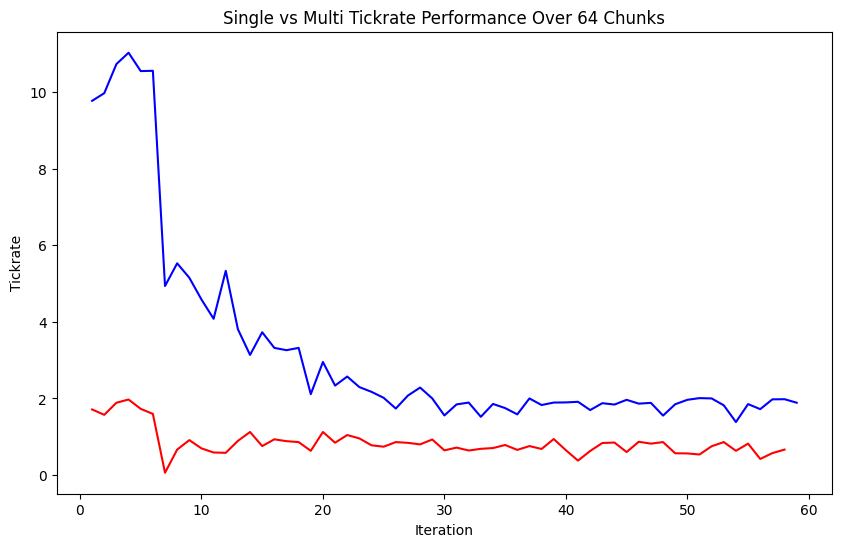

In [150]:
st_data = st_df[128].dropna()
mt_data = mt_df[128].dropna()

plt.figure(figsize=(10,6))

plt.plot(st_data, label="Single Threaded", color='b')
plt.plot(mt_data, label="Multi Threaded", color='r')

plt.title("Single vs Multi Tickrate Performance Over 64 Chunks")
plt.xlabel("Iteration")
plt.ylabel("Tickrate")